## Regresyon Analizi
Regresyon anlizini basitçe neden-sonuç ilişkisi şeklinde ifade edebiliriz. Değişkenlerin birbirini ne ölçüde etkilediğini inceler.
> f (x) = y 
    > x:Bağımsız değişken
    > y:Bağımlı değişken

Regresyon analizi bir tahmin analizidir. Bağımlı değişkenlerin bağımsız değişkenler yardımıyla tahmin edilmesini sağlar ve bağımlı değişkenleri etkileyen bağımsız değişkenleri ortaya çıkarır.

# Basit Doğtusal Regresyon

Bağımsız değişken (X) ile bağımlı değişken (Y) üzerindeki değişimi açıklamayı, bağımsız değişkendeki bir birimlik değişimin bağımlı değişken üzerindeki etkisini ölçmeyi amaçlar.

Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
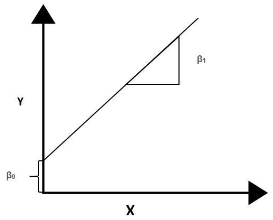

> **y = β0 + β1X + ϵ**

β0:Doğrunun y-eksenini kestiği yer ve regresyon sabitidir.

β1:Doğrunun eğimi veya regresyon katsayısıdır.

ϵ: Rastgele(Tesadüfi-Şans) hata değeridir.

### Regresyon Modelinin Performansı
Bağımsız değişken x’in, regresyon modeli ile bağımlı değişken y’i ne kadar açıkladığı yüzdesinin ölçütü olan belirtme katsayısı bir diğer adıyla determinasyon katsayısıdır ve R2 ile gösterilir. Belirtme katsayısı, bağımlı değişkendeki değişimin yüzde kaçının bağımsız değişkenler tarafından açıklanabildiğini gösterir.
* R2, “0” ile “1” arasında değerler alır. **0 < R2 < 1** 
* Değişkenler arasında doğrusal bir ilişki olduğunda, R2 değerinin 1’e yaklaşması; bağımlı değişkendeki değişimin büyük bir kısmının bağımsız değişkenler tarafından açıklandığını gösterir. 
* Bağımlı ve bağımsız değişken arasındaki ilişkinin derecesi ve yönünü gösteren korelasyon katsayısının(r) karesi belirtme katsayısına (R2) eşittir. 
> **R2 = Açıklanabilen Değişim / Toplam Değişim = RKT / YOAKT**
        RKT:Regresyon kareler toplamı
        YOAKT:Y ortalama ayrılış kareler toplamı
        
Kurulan regresyon modelinin performansı, R2 ile ölçülür. R2, 1’e ne kadar yakınsa, regresyon o kadar anlamlıdır ve belirleyicidir. Bu konuda bilimsel bir karar verebilmek için hipotez testi yapılır.

### Düzeltilmiş R2
**R2**, lineer regresyon modeli için bağımsız değişkenlerimiz (X) tarafından açıklanan bağımlı değişkenimizdeki (Y) varyasyon oranını ölçer. **Düzeltilmiş R-kare** sadece gerçekte bağımlı değişkeni etkileyen bağımsız değişkenler tarafından açıklanan varyasyon oranını ölçer.

> **Düzeltilmiş R2 = 1 - ( 1 – R2 ) * n - 1 / n - p - 1**
        
        n:Örneklemdeki veri sayısı        
        p:Bağımsız değişken sayısı
        
### Korelasyon Katsayısı (r)
Korelasyon katsayısı, bağımlı değişken ile bağımsız değişkenler arasındaki ilişkinin gücünü gösteren bir katsayıdır. Örneğin; öğrencinin ders çalışma süresi ile aldığı istatistik notu arasında ilişki olup olmadığı korelasyon katsayısı ile incelenebilir.  Korelasyon katsayısı değişkenlerin yönü ve etkileşimlerin nasıl olduğu hakkında bilgi verir.

Korelasyon katsayısı iki değişken arasındaki doğrusal ilişkinin ölçüsü olup incelenen değişkenlerin birimlerinden bağımsızdır ve **-1 ≤ r ≤ 1** arasındadır.
* Korelasyon katsayısının 0’a yaklaşması değişkenler arasında zayıf ilişkinin varlığını gösterir. 
* Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.

#### Korelasyon Katsayısı ve R Kare Farkları
1. Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkiyi temsil etmek için kullanılır. Regresyon katsayısı ise bir değişkeni başka bir değişken temelinde tahmin etmek için kullanılır.
2. Korelasyon değişkenler arasındaki ilişkinin gücünü gösterir. Regresyon katsayısı ise bağımsız değişkendeki birim değişikliğinin bağımlı değişken üzerindeki etkisini gösterir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df = {"area":[2600,3000,3200,3600,4000],
      "price":[550000,565000,610000,680000,725000]}
df = pd.DataFrame(df)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


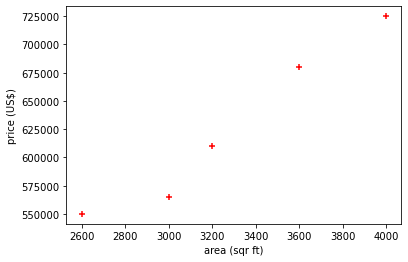

In [11]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel("price (US$)")
plt.scatter(df.area, df.price, color = "red", marker="+")

In [27]:
reg_model = linear_model.LinearRegression() # Bir model nesnesi oluşturuyoruz.
reg_model.fit(df[["area"]], df[["price"]]) # Modelimizi kuruyoruz.

LinearRegression()

In [33]:
# Modelimizi kullanarak bir tahmin yapalım.
reg_model.predict(np.array([3300]).reshape(-1,1)) # 3300 ft2 olan bir evin fiyatını tahmin edelim.

C:\Users\sahik\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [19]:
reg_model.intercept_  # β0 katsayısını çağırır.

array([180616.43835616])

In [20]:
reg_model.coef_   # β1 katsayısını çağırır.

array([[135.78767123]])

> **BİLGİ:** Scikit-learn kütüphanesinde eğitim verisinden elde edilen parametrelerin sonuna alt tire(_) konur. Böylece bulunan parametreler ile kullanıcıdan alınan parametreler birbirinden ayrılır.

In [22]:
reg_model.score(df[["area"]], df[["price"]])  # R2 değerini hesaplıyoruz.

0.9584301138199486

>  R2 modelin açıklanabilirliği ile ilgili bir değerdir. R2 elimizdeki bağımsız değişkenleri kullandığımızda bağımlı değişkendeki değişimin yüzde kaçını açıklayabiliyoruz bilgisini bize sunar. 

In [34]:
# y = mx + b
y = 135.78767123 * 3300 + 180616.43835616
y  # modelimizi kullanarak elde ettiğimiz sonuç ile aynı sonucu elde ettiğimizi göriyoruz.

628715.75341516

In [46]:
df_ = {"area":[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]}
df_ = pd.DataFrame(df_area)
df_

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [48]:
p = reg_model.predict(df_)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [49]:
df_["prices"] = p

In [50]:
df_.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


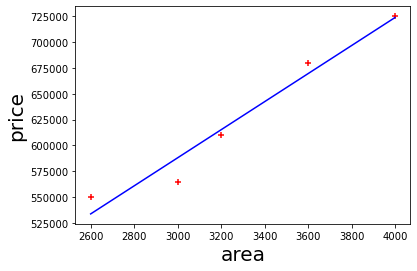

In [54]:
%matplotlib inline
plt.xlabel("area", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg_model.predict(df[["area"]]),color="blue")

### REKLAM VERİ SETİNİ KULLANARAK BİR UYGULAMA DAHA YAPALIM

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [89]:
import os
print("Konum: ", os.getcwd())
os.chdir('C:\\Users\\sahik\\Documents\\GitHub\\MachineLearning101\\data')
print("Güncel Konum:", os.getcwd())

Konum:  C:\Users\sahik\Documents\GitHub\MachineLearning101
Güncel Konum: C:\Users\sahik\Documents\GitHub\MachineLearning101\data


In [90]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Veriseti 3 iletişim kanalında(TV, Radio, Newspaper) yapılan reklam harcamalarının satışlara etkisini göstermektedir. Biz bu çalışmada TV ve satış değişkenleriyle ilgileneceğiz. Amacımız TV-reklam harcamalarını modelleyebilmek ve çalışmalar yapmak.

In [91]:
df.info()  # değişkenlerin veri tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [92]:
df.describe() # verisetinin istatistiksel olarak incelenmesi

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### MODEL KURULUMU

In [95]:
X = df[["TV"]]  # bağımsız değişken
y = df[["Sales"]]  # bağımlı değişken

In [97]:
lin_reg = LinearRegression().fit(X,y)

In [112]:
# Doğrusal Ragresyon Formülündeki Ağırlıkları Bulalım
# y = B0 + B1 * X

print("B0:", round(lin_reg.intercept_[0],2))
print("B1:", round(lin_reg.coef_[0][0],2))

B0: 6.97
B1: 0.06


In [113]:
y_pred = lin_reg.predict(X)  # Kurduğumuz model ile tahmin yapalım

In [114]:
# Başarı Değerlendirme

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)  # Tahmin Hatalarının Karelerinin Toplamının Ortalamasını verir.
print("R2:",r2)   # Modelin verisetini açıklama yüzdesini verir.

MSE: 5.2177438977951285
R2: 0.8121757029987414


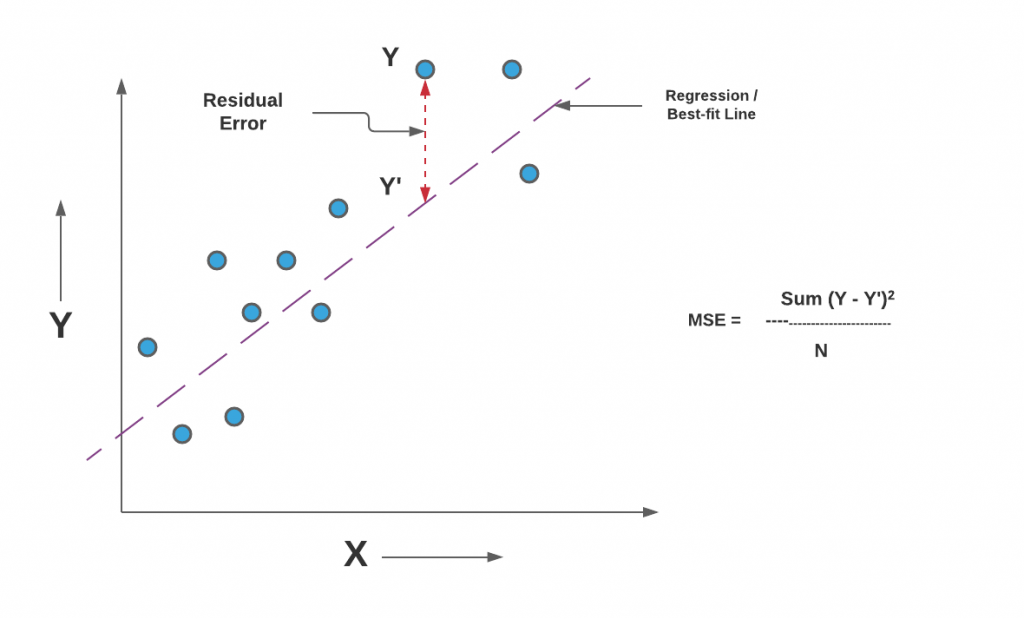
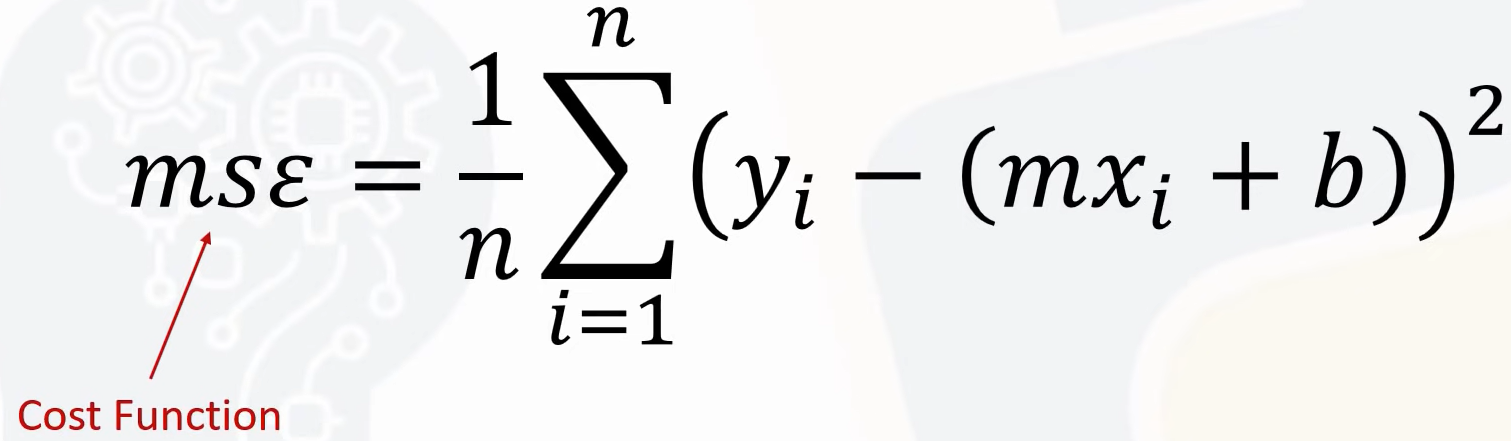

In [115]:
# Hata ve Hata Kareler Ortalaması Kendimiz Hesaplayalım (MSE)
gercek_y = y
tahmin_edilen_y = pd.DataFrame(lin_reg.predict(X))
hatalar = pd.concat([gercek_y,tahmin_edilen_y],axis=1)
hatalar

,Sales,0
0,22.1,19.737265
1,10.4,9.443004
2,12.0,7.928816
3,16.5,15.377734
4,17.9,17.002852
...,...,...
195,7.6,9.093576
196,14.0,12.199603
197,14.8,16.792086
198,25.5,22.704630


In [116]:
hatalar.columns=["gerçek_y","tahmin_edilen_y"]
hatalar.head(3)

,gerçek_y,tahmin_edilen_y
0,22.1,19.737265
1,10.4,9.443004
2,12.0,7.928816


In [118]:
hatalar["hata"] = hatalar.gerçek_y - hatalar.tahmin_edilen_y
hatalar.head(3)

,gerçek_y,tahmin_edilen_y,hata
0,22.1,19.737265,2.362735
1,10.4,9.443004,0.956996
2,12.0,7.928816,4.071184


In [119]:
hatalar["hata_kareler"] = hatalar.hata**2
hatalar.head(3)

,gerçek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,19.737265,2.362735,5.582516
1,10.4,9.443004,0.956996,0.915842
2,12.0,7.928816,4.071184,16.574543


In [120]:
np.mean(hatalar.hata_kareler)

5.2177438977951285

Hata kareler ortalaması, veriler üzerinde elde ettiğimiz ortalama hatamızdır. Yani tahmin edilen değer ve gerçek değer arasındaki farkının karesini alıp ortalamasını aldığımızda hatamızın 5.2 olduğu sonucuna ulaştık.

### Regresyon Grafiği

C:\Users\sahik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'TV Harcamaları')

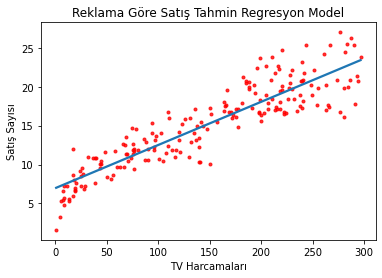

In [128]:
g = sns.regplot(df.TV, df.Sales, ci=None, scatter_kws={"color":"r", "s":9})  # Seaborn kütüphanesini kullanarak TV ve satış değişkeni üzerinden bir regresyon görselleştirmesi yapıyoruz.
g.set_title("Reklama Göre Satış Tahmin Regresyon Model")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")